<a href="https://colab.research.google.com/github/kungfumas/stbi/blob/master/berhasil23_Google_Search_Trends_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/2020-google-search-trends-in-indonesia-from-wfh-ghosting-to-bintang-emon-fcbb357ad9cf https://towardsdatascience.com/tracking-coronavirus-engagement-with-google-trends-in-python-5a4b08bc6977 https://blog.clairvoyantsoft.com/covid-19-prediction-using-lstm-cba2fd4fc7fc https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887

https://colab.research.google.com/drive/1LpsOXmMoj6O5vaq7l_o7FiXwMN12nW1u#scrollTo=CkxLq8HBkhQ7

http://ijphs.iaescore.com/index.php/IJPHS/article/view/20512

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8186442/ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7580652/

# Import and Set Up

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import datetime

In [ ]:
!pip install pytrends

In [ ]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', tz=300, geo='ID')

# Top charts

In [ ]:
# Get Google Top Charts
df = pytrend.top_charts(date=2020, hl='en-US', tz=300, geo='ID')
df

,title,exploreQuery
0,Ghosting,
1,Gabut,
2,Lockdown,
3,Rebahan,
4,WFH,
5,Resesi,
6,Kuota Belajar,
7,Virus Corona,
8,PSBB,
9,Among Us,


In [ ]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='indonesia')
df

,0
0,Tottenham vs Brentford
1,Lazio vs Udinese
2,Laura
3,AAA) 2021
4,Risma
5,Jin BTS
6,Money Heist Season 5 Part 2
7,Hari Disabilitas Internasional
8,Evolusi
9,Man utd vs Arsenal


# Deepdive Top Searches

In [ ]:
kw_list = ['covid 19','ppkm','lockdown','ptm','wfh','vaksinasi','klaster','virus corona','psbb','varian delta']

In [ ]:
trends_df = pd.DataFrame()
for i in kw_list:
   ##build out query
   temp_df = pd.DataFrame()
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2021-11-10')
   
   ##save trend to dictionary
   temp_df = pytrend.interest_over_time()
   temp_df['kw'] = i
   temp_df.reset_index(level=0, inplace=True)
   temp_df.columns = ['date', 'value', 'isPartial', 'kw']

   trends_df = pd.concat([trends_df,temp_df[['date','value','kw']]])

trends_df

,date,value,kw
0,2020-01-05,0,covid 19
1,2020-01-12,0,covid 19
2,2020-01-19,0,covid 19
3,2020-01-26,0,covid 19
4,2020-02-02,0,covid 19
...,...,...,...
92,2021-10-10,2,varian delta
93,2021-10-17,2,varian delta
94,2021-10-24,2,varian delta
95,2021-10-31,0,varian delta


In [ ]:
trends_df['date'] = pd.to_datetime(trends_df.date,format='%Y-%m-%d')

In [ ]:
trends_df = trends_df.reset_index(drop=True)

In [ ]:
def func(row):
    if row['kw'] == 'ppkm':
        return 'ppkm, varian delta'
    
    elif row['kw'] =='psbb':
        return 'psbb, lockdown' 
    elif row['kw'] =='lockdown':
        return 'psbb, lockdown' 
    else:
        return row['kw']

trends_df['group'] = trends_df.apply(func, axis=1)

In [ ]:
trends_df = trends_df.reset_index(drop=True)

In [ ]:
trends_df.columns.duplicated().any()

False

In [ ]:
trends_df.to_csv('googletrend.csv')

In [ ]:
trends_df.index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Text(0.5, 1.0, 'Trend Score by Keyword')

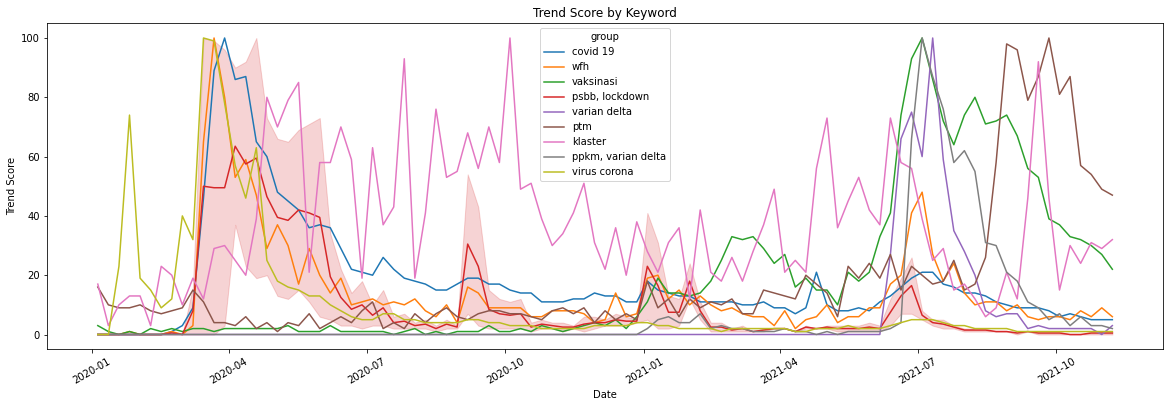

In [ ]:
# create plot

f, ax = plt.subplots(figsize=(20, 6))

sns.set_color_codes("pastel")
sns.lineplot(x="date", y="value", data=trends_df.sort_values("date", ascending=True), hue="group",color="b")

plt.xlabel('Date')
plt.ylabel('Trend Score')
plt.xticks(rotation=30)
plt.title('Trend Score by Keyword')

# Covid deepdive

## Search by Region

### Exploration

In [ ]:
kw_list = ['covid 19','ppkm','lockdown','ptm','wfh','vaksinasi','klaster','virus corona','bansos','varian delta']

city_df = pd.DataFrame()
for i in kw_list:
   ##build out query
   temp_df = pd.DataFrame()
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2021-11-10')
   
   ##save trend to dictionary
   temp_df = pytrend.interest_by_region(resolution='CITY', inc_low_vol=True, inc_geo_code=False)
   temp_df['kw'] = i
   temp_df.reset_index(level=0, inplace=True)
   temp_df.columns = ['geoname', 'value', 'kw']

   city_df = pd.concat([city_df,temp_df[['geoname','value','kw']]])

city_df

,geoname,value,kw
0,Aceh,51,covid 19
1,Bali,85,covid 19
2,Bangka Belitung Islands,100,covid 19
3,Banten,64,covid 19
4,Bengkulu,67,covid 19
...,...,...,...
29,West Kalimantan,37,varian delta
30,West Nusa Tenggara,21,varian delta
31,West Papua,33,varian delta
32,West Sulawesi,14,varian delta


In [ ]:
city_df.geoname.unique()

array(['Aceh', 'Bali', 'Bangka Belitung Islands', 'Banten', 'Bengkulu',
       'Central Java', 'Central Kalimantan', 'Central Sulawesi',
       'East Java', 'East Kalimantan', 'East Nusa Tenggara', 'Gorontalo',
       'Jambi', 'Lampung', 'Maluku', 'North Kalimantan', 'North Maluku',
       'North Sulawesi', 'North Sumatra', 'Papua', 'Riau', 'Riau Islands',
       'South East Sulawesi', 'South Kalimantan', 'South Sulawesi',
       'South Sumatra', 'Special Capital Region of Jakarta',
       'Special Region of Yogyakarta', 'West Java', 'West Kalimantan',
       'West Nusa Tenggara', 'West Papua', 'West Sulawesi',
       'West Sumatra'], dtype=object)

In [ ]:
def region_name(row):
    if row['geoname'] == 'Special Capital Region of Jakarta':
        return 'Jakarta'
    elif row['geoname'] =='Banten' or row['geoname'] =='Central Java' or row['geoname'] =='East Java' or row['geoname'] =='West Java' or row['geoname'] =='Special Region of Yogyakarta':
        return 'Java excl Jakarta' 
    elif row['geoname'] =='Aceh' or row['geoname'] =='Bangka Belitung Islands' or row['geoname'] =='Bengkulu' or row['geoname'] =='Jambi' or row['geoname'] =='Lampung' or row['geoname'] =='North Sumatra' or row['geoname'] =='Riau' or row['geoname'] =='Riau Islands' or row['geoname'] =='South Sumatra' or row['geoname'] =='West Sumatra':
        return 'Sumatera' 
    elif row['geoname'] =='Central Sulawesi' or row['geoname'] =='Gorontalo' or row['geoname'] =='North Sulawesi' or row['geoname'] =='South East Sulawesi' or row['geoname'] =='South Sulawesi' or row['geoname'] =='West Sulawesi':
        return 'Sulawesi' 
    elif row['geoname'] =='Central Kalimantan' or row['geoname'] =='East Kalimantan' or row['geoname'] =='North Kalimantan' or row['geoname'] =='South Kalimantan' or row['geoname'] =='West Kalimantan':
        return 'Kalimantan'
    elif row['geoname'] =='Bali' or row['geoname'] =='East Nusa Tenggara' or row['geoname'] =='Maluku' or row['geoname'] =='North Maluku' or row['geoname'] =='Papua' or row['geoname'] =='West Nusa Tenggara' or row['geoname'] =='West Papua':
        return 'Nusa Tenggara & Papua'  
    else:
        return 'others'

city_df['region'] = city_df.apply(region_name, axis=1)
city_df

,geoname,value,kw,region
0,Aceh,51,covid 19,Sumatera
1,Bali,85,covid 19,Nusa Tenggara & Papua
2,Bangka Belitung Islands,100,covid 19,Sumatera
3,Banten,64,covid 19,Java excl Jakarta
4,Bengkulu,67,covid 19,Sumatera
...,...,...,...,...
29,West Kalimantan,37,varian delta,Kalimantan
30,West Nusa Tenggara,21,varian delta,Nusa Tenggara & Papua
31,West Papua,33,varian delta,Nusa Tenggara & Papua
32,West Sulawesi,14,varian delta,Sulawesi


In [ ]:
region_df = pd.DataFrame()
region_df = city_df.groupby(['region','kw']).value.mean().reset_index()
region_df.head()

,region,kw,value
0,Jakarta,bansos,100.0
1,Jakarta,covid 19,67.0
2,Jakarta,klaster,30.0
3,Jakarta,lockdown,100.0
4,Jakarta,ppkm,100.0


### Result

In [ ]:
!pip install squarify

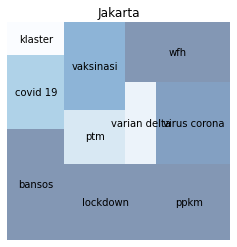

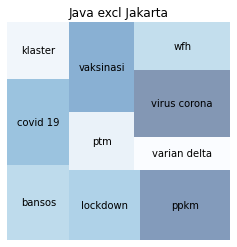

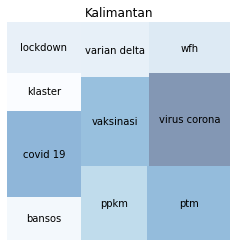

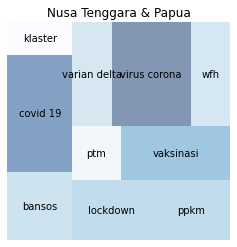

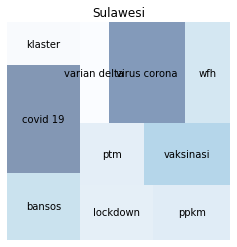

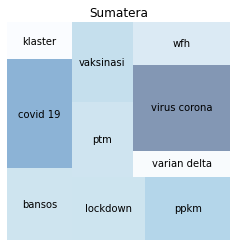

In [ ]:
import matplotlib
import squarify # pip install squarify

for i in region_df.region.unique():
  temp_city_df = region_df.loc[region_df['region'] == i]

  # create a color palette, mapped to these values
  cmap = matplotlib.cm.Blues
  mini=min(temp_city_df['value'])
  maxi=max(temp_city_df['value'])
  norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
  colors = [cmap(norm(value)) for value in temp_city_df['value']]

  fig, ax = plt.subplots(1, figsize = (4,4))
  squarify.plot(sizes=temp_city_df['value'], 
                label=temp_city_df['kw'], 
                alpha=.5,
                color = colors)
  plt.title(i)
  plt.axis('off')
  plt.show()

## Related Queries and Topics

### Exploration

In [ ]:
# Get Google Keyword Suggestions
pytrend.build_payload(kw_list=['virus corona'], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
keywords = pytrend.suggestions(keyword='virus corona')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid') 

,title,type
0,Coronavirus disease 2019,Disease
1,Coronavirus,Virus
2,Severe acute respiratory syndrome coronavirus 2,Virus
3,2020 coronavirus pandemic in Singapore,Event
4,Severe acute respiratory syndrome coronavirus,Virus


In [ ]:
kw_list = ['ghosting','gabut','lockdown','rebahan','wfh','resesi','kuota belajar','virus corona','psbb','among us']

suggestion = pd.DataFrame()
for i in kw_list:
   ##build out query
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pd.DataFrame(pytrend.suggestions(keyword=i))
   temp_df['kw'] = i
   temp_df.reset_index(level=0, inplace=False)

   suggestion = pd.concat([suggestion,temp_df])

suggestion

,mid,title,type,kw
0,/g/11b7_r92z7,Ghosting,Topic,ghosting
1,/m/09d8d8,Ghosting,Topic,ghosting
2,/g/11fpj82f4j,Ghosting: The Spirit of Christmas,Film,ghosting
3,/g/120x601v,Ghosting,Musical group,ghosting
0,/m/03h_dfr,Massimo Gabutti,Entrepreneur,gabut
0,/m/07l88z,Lockdown,Topic,lockdown
1,/m/012659r0,12 Rounds 3: Lockdown,2015 film,lockdown
2,/m/0hqyk,Half Past Dead,2002 film,lockdown
3,/g/11d_8bffh_,Kundali Bhagya,Drama series,lockdown
4,/m/0fk9t5,Lockdown,2000 film,lockdown


In [ ]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()

In [ ]:
related_queries

{'among us': {'rising':                       query    value
  0            cheat among us  1042200
  1             among us game   882800
  2         impostor among us   621200
  3                  impostor   570300
  4           among us gambar   520250
  5             skin among us   299050
  6           among us adalah   293850
  7        wallpaper among us   258100
  8        cara main among us   243050
  9         among us mod menu   207300
  10       among us cheat apk   206650
  11       nama nama among us   198650
  12  download among us cheat   191350
  13  among us cheat download   187500
  14  download cheat among us   183450
  15            among us pink   178400
  16         discord among us   175100
  17                  discord   173600
  18               among pink   173300
  19  among us cheat impostor   162600
  20    cara bermain among us   161050
  21            foto among us   156750
  22       character among us   143550
  23             pet among us   139050
  2

In [ ]:
kw = 'among us'
# for rising related queries
related_queries_rising = related_queries.get(kw).get('rising')
# for top related queries
related_queries_top = related_queries.get(kw).get('top')

In [ ]:
related_queries_rising

,query,value
0,cheat among us,1042200
1,among us game,882800
2,impostor among us,621200
3,impostor,570300
4,among us gambar,520250
5,skin among us,299050
6,among us adalah,293850
7,wallpaper among us,258100
8,cara main among us,243050
9,among us mod menu,207300


In [ ]:
related_queries_top

,query,value
0,among us mod,100
1,download among us,84
2,apk among us,75
3,cheat among us,61
4,among us apk mod,55
5,among us game,52
6,game,52
7,impostor among us,37
8,among us pc,34
9,impostor,34


In [ ]:
df_clean = pd.DataFrame()
df_clean = related_queries_top
df_clean['clean_query'] = df_clean['query'].str.replace('virus', '').str.replace('corona', '')
df_clean

,query,value,clean_query
0,among us mod,100,among us mod
1,download among us,84,download among us
2,apk among us,75,apk among us
3,cheat among us,61,cheat among us
4,among us apk mod,55,among us apk mod
5,among us game,52,among us game
6,game,52,game
7,impostor among us,37,impostor among us
8,among us pc,34,among us pc
9,impostor,34,impostor


In [ ]:
df_clean["clean_query"]=df_clean["clean_query"].str.split(" ")
df_clean = df_clean.explode("clean_query").reset_index(drop=True)
df_clean

,query,value,clean_query
0,among us mod,100,among
1,among us mod,100,us
2,among us mod,100,mod
3,download among us,84,download
4,download among us,84,among
...,...,...,...
78,download among us cheat,11,cheat
79,among us cheat download,11,among
80,among us cheat download,11,us
81,among us cheat download,11,cheat


In [ ]:
df_cloud = pd.DataFrame(df_clean.groupby(['clean_query']).value.sum()).reset_index()
df_cloud

,clean_query,value
0,adalah,17
1,among,754
2,apk,184
3,cara,14
4,cheat,95
5,download,193
6,gambar,31
7,game,104
8,impostor,71
9,indonesia,16


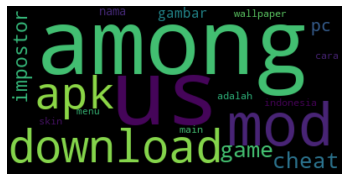

In [ ]:
d = {}
for a, x in df_cloud.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
kw_list = ['ghosting','gabut','lockdown','rebahan','wfh','resesi','kuota belajar','virus corona','psbb','among us']

related_df = pd.DataFrame()
for i in kw_list:
   # Related Queries, returns a dictionary of dataframes
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   related_queries = pytrend.related_queries()
   related_queries_top = related_queries.get(i).get('top')
   
   ##save trend to dictionary
   temp_df = pd.DataFrame()
   temp_df = related_queries_top
   temp_df['clean_query'] = temp_df['query'].str.replace(i, '').str.split(" ")
   temp_df = temp_df.explode("clean_query").reset_index(drop=True)
   temp_df['kw'] = i
   temp_df.reset_index(level=0, inplace=False)

   temp_sum_df = pd.DataFrame()
   temp_sum_df['kw'] = i
   temp_sum_df = pd.DataFrame(temp_df.groupby(['clean_query','kw']).value.sum()).reset_index()

   related_df = pd.concat([related_df,temp_sum_df])

related_df

,clean_query,kw,value
0,,ghosting,225
1,adalah,ghosting,100
2,apa,ghosting,67
3,arti,ghosting,26
4,artinya,ghosting,32
...,...,...,...
12,mod,among us,214
13,nama,among us,24
14,pc,among us,51
15,skin,among us,18


### Result

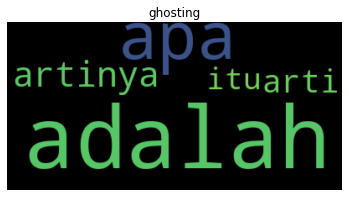

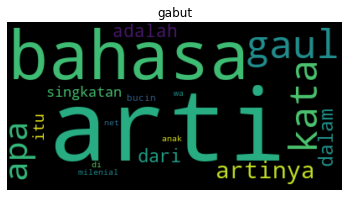

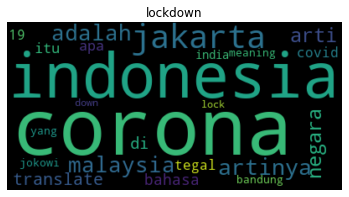

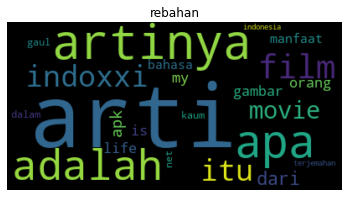

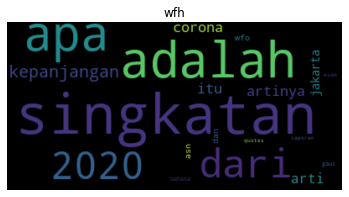

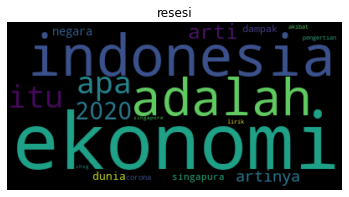

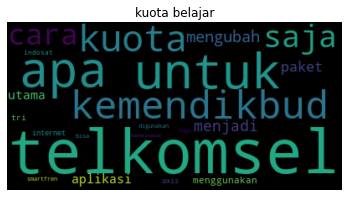

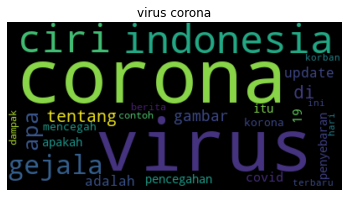

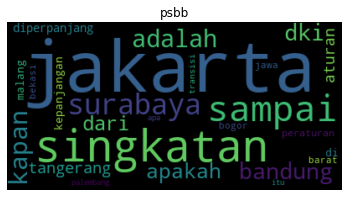

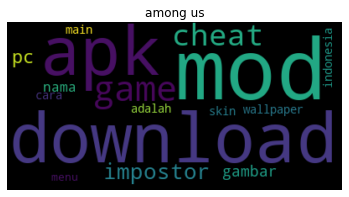

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for i in related_df.kw.unique():
  df_cloud = related_df.loc[related_df['kw'] == i]
  df_cloud = df_cloud.drop(columns= 'kw') 

  d = {}
  for a, x in df_cloud.values:
      d[a] = x

  wordcloud = WordCloud()
  wordcloud.generate_from_frequencies(frequencies=d)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(i)
  plt.show()

In [ ]:
kw = 'virus corona'
# for rising related topics
related_topics_rising = related_topics.get(kw).get('rising')
# for top related topics
related_topics_top = related_topics.get(kw).get('top')

NameError: ignored

In [ ]:
related_topics_rising

In [ ]:
related_topics_top

# Other Interesting Trend

## Bintang Emon

In [ ]:
# Get Google Keyword Suggestions
pytrend.build_payload(kw_list=['bintang emon'], geo='ID', cat=0,timeframe='2020-01-01 2020-12-20')
related_queries = pytrend.related_queries()
df_bintang_emon = pd.DataFrame(related_queries.get('bintang emon').get('top'))
# df_bintang_emon['terms'] = df_bintang_emon['query'].str.replace('bintang emon', '')
df_bintang_emon

In [ ]:
trends_bintang_emon = pd.DataFrame()
kw = df_bintang_emon['query'].tolist()

for i in kw:
   ##build out query
   temp_df = pd.DataFrame()
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pytrend.interest_over_time()
   temp_df['kw'] = i
   temp_df['terms'] = temp_df['kw'].str.replace('bintang emon', '').str.strip()
   temp_df.reset_index(level=0, inplace=True)
   temp_df.columns = ['date', 'value', 'isPartial', 'kw', 'terms']

   trends_bintang_emon = pd.concat([trends_bintang_emon,temp_df[['date','value','kw', 'terms']]])

trends_bintang_emon

In [ ]:
print(df_bintang_emon['query'].tolist())

In [ ]:
def func_group(row):
    if row['terms'] == 'profil' or row['terms'] == 'biodata' or row['terms'] == 'nama asli' or row['terms'] == 'umur' or row['terms'] == 'siapa' or row['terms'] == 'komika':
        return 'profile'
    elif row['terms'] =='twitter' or row['terms'] == 'ig':
        return 'social media' 
    else:
        return row['terms']

trends_bintang_emon['group'] = trends_bintang_emon.apply(func_group, axis=1)

In [ ]:
# create plot
f, ax = plt.subplots(figsize=(20, 6))

sns.set_color_codes("pastel")
sns.lineplot(x="date", y="value", data=trends_bintang_emon.sort_values("date", ascending=True), hue="group",
            color="b")

plt.xlabel('Date')
plt.ylabel('Trend Score')
plt.xticks(rotation=30)
plt.title('Trend Score by Keyword')

## What People Do

In [ ]:
# Get Google Keyword Suggestions
pytrend.build_payload(kw_list=['cara'], geo='ID', cat=0,timeframe='2020-01-01 2020-12-20')
related_queries = pytrend.related_queries()
df_cara = pd.DataFrame(related_queries.get('cara').get('rising'))

df_cara

In [ ]:
trends_df = pd.DataFrame()
kw = df_cara['query'].tolist()

for i in kw:
   ##build out query
   temp_df = pd.DataFrame()
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pytrend.interest_over_time()
   temp_df['kw'] = i
   temp_df['terms'] = temp_df['kw'].str.replace('cara', '').str.replace('bagaimana', '').str.strip()
   temp_df.reset_index(level=0, inplace=True)
   temp_df.columns = ['date', 'value', 'isPartial', 'kw', 'terms']

   trends_df = pd.concat([trends_df,temp_df[['date','value','kw', 'terms']]])

trends_df

In [ ]:
trends_df['terms'].unique()

In [ ]:
def func_group_l1(row):
    if row['terms'] == 'daftar prakerja' or row['terms'] == 'daftar kartu prakerja' or row['terms'] == 'mendaftar kartu prakerja':
        return 'prakerja'
    elif row['terms'] =='daftar bantuan umkm' or row['terms'] == 'cek bantuan umkm':
        return 'bantuan umkm' 
    elif row['terms'] =='tata  sholat idul fitri' or row['terms'] == 'sholat idul fitri':
        return 'sholat idul fitri' 
    else:
        return row['terms']

trends_df['group_l1'] = trends_df.apply(func_group_l1, axis=1)
trends_df

In [ ]:
trends_df['group_l1'].unique()

In [ ]:
def func_group_l2(row):
    if row['group_l1'] == 'prakerja' or row['group_l1'] == 'bantuan umkm':
        return 'work support'
    elif row['group_l1'] =='mencegah virus corona' or row['group_l1'] == 'membuat hand sanitizer':
        return 'covid' 
    elif row['group_l1'] =='mendapatkan token listrik gratis' or row['group_l1'] == 'membuat soal di google form' or row['group_l1'] == 'mendapatkan kuota gratis' or row['group_l1'] == 'creenshot di laptop':
        return 'wfh' 
    elif row['group_l1'] =='sholat idul fitri' or row['group_l1'] == 'mandi wajib dan doanya' or row['group_l1'] == 'wudhu' or row['group_l1'] == 'mandi wajib dan doanya':
        return 'religious' 
    elif row['group_l1'] =='membuat dalgona coffee' or row['group_l1'] == 'membuat boba' or row['group_l1'] == 'membuat cireng' or row['group_l1'] == 'membuat cireng' or row['group_l1'] == 'membuat cimol' or row['group_l1'] == 'membuat martabak manis' or row['group_l1'] == 'membuat donat':
        return 'cooking' 
    else:
        return 'others'

trends_df['group_l2'] = trends_df.apply(func_group_l2, axis=1)
trends_df

In [ ]:
trends_df = trends_df.loc[trends_df['kw'] != 'bagaimana cara']
data = trends_df.groupby(['group_l1','group_l2']).value.sum().reset_index()

f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="value", 
            y="group_l1", 
            hue="group_l2", 
            data=data.sort_values("group_l2", ascending=True))
plt.ylabel("Activity", size=14)
plt.xlabel("Trend Level", size=14)
plt.title("'How To' Searches - Indonesia", size=18)